## hcds-a6-final-project-report

### Purpose 
This notebook details the background, analytical process, results and implications of a study seeking to understand the relationship between: opioid prescription rate, opioid death rate and poverty rate in the US during the period 2006-2015. 

### 1. Background 
If you Google ‘opioid crisis’, you are likely to find many articles that highlight the increase in deaths associated with opioid usage in the US over the past two decades.   According to the CDC<sup>1</sup>, drug overdose deaths nearly tripled during the period 1999 to 2014 which some commentators<sup>2</sup> have ascribed to the concurrent increase in opioid prescription rate, which quadrupled from 1999 to 2010.   One explanation provided is that overprescription of opioid pain relievers is a determinant of fatal overdose and abuse<sup>3</sup>.  In particular, individuals who are prescribed opioids for periods of over 90 days are unlikely to discontinue using and may switch to obtaining them illicitly when they can no longer obtain them through legitimate means<sup>4</sup>.   These illicit sources are more likely to include heroin and fentanyl which have been implicated in the significant increase in opioid death rates during 2014-2015<sup>5</sup>.  

The response to this crisis has varied.  Some states have enacted legislation designed to reduce opioid prescribing.  For example, Florida prohibited dispensing by prescribers in 2011 and subsequently experienced a 52% decline in oxycodone overdose death rate<sup>6</sup>.  The CDC advises local jurisdictions to target “high-prescribing areas for interventions such as...virtual physical therapy sessions with pain coping skills training...for chronic pain”<sup>7</sup>.  These approaches have, however, been criticized on the grounds that they penalize doctors for prescribing opioids to people who need them and for ignoring the wider socio-economic factors that contribute to drug addiction<sup>8</sup>.

This aim of this research is to further this debate by: a) revisiting data on opioid prescribing and opioid overdose deaths during the period 2006 to 2015 and b) overlaying economic data to explore whether the relationship between opioid prescribing and opioid overdose is as straightforward as some of the Google headlines would suggest. 

Specificially, this study will address the following questions: 

##### 1. To what extent can the increase in deaths associated with opioid usage be described as a crisis? 

##### 2. How strong is the relationship between opioid prescription rate and opioid overdose rate? 
If overprescription of opioids is a determinant of fatal overdose (as has been suggested by existing research), one would expect to see this reflected in the strength of the relationship between the opioid prescription rate and opioid overdose rate. 

##### 3. How does the relationship between opioid prescription rate and opioid overdose rate change, given knowledge of the poverty rate? 
If poverty somehow effects the relationship between opioid prescription and overdose rate, the partial correlation between prescription and overdose rate, __given the poverty rate__, would be different to the overall correlation between the prescription and overdose rate.  

### 2. Data acquisition 

The following data points were extracted for each year and state during 2006 to 2015: <br> 
i) __Opioid prescription rate__ <br> 
ii) __Opioid overdose death rate__ <br> 
iii) __Poverty rate__ <br> 

#### i) Opioid prescription rate 
For each year, 2006-2015, a table with:  State, State Abbreviation and Prescribing rate (retail opioid prescriptions dispensed per 100 persons), can be found at the __[CDC website](https://www.cdc.gov/drugoverdose/maps/rxrate-maps.html)__. The three columns in these tables were copied into a single text file and appended with the relevant year.  The resultant file (prescribing_rate.csv) can be found as an attachment within this Github repository. This contains the following columns: <br> 
1. year 
2. state
3. state_abbrev 
4. prescribing_rate = number of opioid prescriptions dispensed per 100 persons 


#### ii) Opioid overdose death rate 
The definition of opioid overdose death rate is the same as that used in the Rudd et al (2016)<sup>1</sup> study. These data were extracted from the __[CDC Wonder database](https://wonder.cdc.gov/controller/datarequest/D77)__ using the following parameters: <br> 

| Parameter | Value | 
| --- | --- | 
| Organize table layout - Group Results By: | State |
| Organize table layout - Measures: | Keep default measures (Deaths, Population, Crude Rate |
| Selection location: | *All* (The United States) |
| Select demographics: | All Ages; All Genders; All Origins; All Races |
| Select year and month: | 2006 |
| Select weekday, autopsy and place of death: | All Weekdays; All Values; All Places |
| Select underlying cause of death: | X40-X44; X60-X64; X85; Y10-Y14 |
| Select multiple causes of death: | T40.0; T40.1; T40.2; T40.3; T40.4; T40.6 |
| Other options: | Export Results; Show Totals; Show Zero Values |

and repeated for 2007, 2008...2015 etc, to yield 10 separate txt files: (Overdose_2006.txt...Overdose_2015.txt), which can be found as attachments within this Github repository. 

These files each contain the following columns: <br> 
1. Notes - empty column 
2. State 
3. State code 
4. Deaths = deaths from opioid overdose as defined from the cause of death as detailed in the above table.  
5. Population = postcensal estimates of the resident population 
6. Crude Rate <br> 


#### iii) Poverty rate 
Poverty rates at a state level for 2006 to 2015 were extracted from the __[United States Census Bureau](https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_16_1YR_S1701&prodType=table)__.<br> 

For each year: <br> 
- Transpose Rows/Columns
- Download...Deselect 'Merge the annotations', 'Include desscriptive data element names'...OK 
- Unzip the downloaded file 
- Copy the file 'ACS_06_EST_S1701.csv' 

to yield 10 separate csv files, which can be found as attachments within this Github repository (ACS_06_EST_S1701.csv, ACS_07_1YR_s1701.csv etc). 

These files contain the following relevant columns: <br> 
1. GEO.display.label = State 
2. HC01_EST_VC01 = population for whom poverty status is determined 
3. HC02_EST_VC01 = population below poverty threshold 


### Licensing of data 
These data are works of the US federal government and, as such, are in the public domain.  The relevant license is CC0 1.0 Universal.  <br> 

### 3. Data processing

#### a) Setup 
Loading packages and setting the working directory.   

This assumes: 

1. The packages: 'data.table', 'plyr', 'dplyr', 'tidyr', 'stringr', 'readr', 'ggplot2', 'Hmisc', 'scales' and 'ppcor', which are available from __[CRAN](https://cran.r-project.org/)__, have been installed. 

2. The working directory contains the data files (.csv, .txt) as detailed in __2. Data Acquisition__. 

In [ ]:
library(data.table)
library(plyr)
library(dplyr)
library(tidyr)
library(stringr)
library(readr)
library(ggplot2)
library(Hmisc)
library(scales)
library(ppcor)


wd <- "/Users/MB/Desktop/DATA_512/Project/Code/"       # specify working directory here 
setwd(wd)

#### b) Read in overdose data 
A list of the ten overdose files were created and each item in the list was read into an R object: overdose_all.  This object was converted to a data.table to allow data.table methods to be applied.  

In [ ]:
  overdose_all <- data.frame(year_list=integer(), state=character(), deaths=integer(), population_for_deaths=integer())

  file_list <- list("Overdose_2006.txt", "Overdose_2007.txt", "Overdose_2008.txt", "Overdose_2009.txt", 
                   "Overdose_2010.txt", "Overdose_2011.txt", "Overdose_2012.txt", "Overdose_2013.txt", 
                   "Overdose_2014.txt", "Overdose_2015.txt")
  year_list <- list(2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015)
  file_year <- cbind(year_list, file_list)

  for(i in 1:length(year_list)){
    file_name <- str_replace_all(paste(file_year[i,2]), fixed(" "), "")
    overdose_data_raw <-read_tsv(file=file_name, col_names=TRUE)
    keep_columns <- c("State", "Deaths", "Population")
    overdose_data <- subset(overdose_data_raw, select=keep_columns)
    overdose_data2 <- cbind(file_year[i,1], overdose_data) 
    names(overdose_data2)[4] <- "Population_for_deaths"
    overdose_all <- rbind(overdose_all, overdose_data2)
    rm(list=c("overdose_data_raw", "keep_columns", "overdose_data", "overdose_data2"))
  }
  
  rm(file_list, year_list, file_year) 

  overdose_all <- setDT(overdose_all)
  overdose_all$State <- as.factor(overdose_all$State)


In [30]:
print(overdose_all)

     year_list         State Deaths Population_for_deaths
  1:      2006       Alabama    124               4628981
  2:      2006        Alaska     29                675302
  3:      2006       Arizona    459               6029141
  4:      2006      Arkansas    140               2821761
  5:      2006    California   1511              36021202
 ---                                                     
504:      2015      Virginia    832               8382993
505:      2015    Washington    716               7170351
506:      2015 West Virginia    664               1844128
507:      2015     Wisconsin    633               5771337
508:      2015       Wyoming     48                586107


#### c) Read in prescribing data 
The prescribing_rate.csv was read into an R object: prescribing, and converted to a data.table. 

In [10]:
  prescribing <- read.csv("prescribing_rate.csv", header=TRUE)
  prescribing <- setDT(prescribing)
  names(prescribing)[1] <- "year_list"
  names(prescribing)[2] <- "State"
  prescribing$year_list <- as.numeric(prescribing$year_list)  

In [11]:
print(prescribing) 

     year_list         State state_abbr prescribing_rate
  1:      2006       Alabama         AL            115.6
  2:      2006        Alaska         AK             63.4
  3:      2006       Arizona         AZ             74.3
  4:      2006      Arkansas         AR             98.3
  5:      2006    California         CA             51.0
 ---                                                    
506:      2015      Virginia         VA             73.5
507:      2015    Washington         WA             74.2
508:      2015 West Virginia         WV            126.4
509:      2015     Wisconsin         WI             71.9
510:      2015       Wyoming         WY             80.9


#### d) Read in poverty data
A list of the ten poverty files were created and each one read into an R object: poverty_all.  This object was converted to a data.table to allow data.table methods to be applied. 

In [19]:
  poverty_all <- data.frame(year_list=integer(), state=character(), population=integer(), poverty_population=integer())
  
  file_list <- list("ACS_06_EST_S1701.csv", "ACS_07_1YR_S1701.csv", "ACS_08_1YR_S1701.csv", "ACS_09_1YR_S1701.csv",
                 "ACS_10_1YR_S1701.csv", "ACS_11_1YR_S1701.csv", "ACS_12_1YR_S1701.csv", "ACS_13_1YR_S1701.csv", 
                 "ACS_14_1YR_S1701.csv", "ACS_15_1YR_S1701.csv")
  year_list <- list(2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015)
  file_year <- cbind(year_list, file_list)
  
  
  for(i in 1:length(year_list)){
    file_name <- str_replace_all(paste(file_year[i,2]), fixed(" "), "")
    poverty_raw <- read.csv(file_name, header=TRUE)
    keep_columns <- c("GEO.display.label", "HC01_EST_VC01", "HC02_EST_VC01" )
    poverty_data <- subset(poverty_raw, select=keep_columns)
    poverty_data2 <- cbind(file_year[i,1], poverty_data)
    names(poverty_data2)[2] <- "State"
    names(poverty_data2)[3] <- "Population_for_poverty"
    names(poverty_data2)[4] <- "Poverty_population"
    poverty_all <- rbind(poverty_all, poverty_data2)
    rm(poverty_raw, keep_columns, poverty_data, poverty_data2)
  }

  rm(file_list, file_year, year_list, file_name, i)

  poverty_all <- setDT(poverty_all)

In [22]:
print(poverty_all)

     year_list         State Population_for_poverty Poverty_population
  1:      2006       Alabama                4482152             742064
  2:      2006        Alaska                 651997              70919
  3:      2006       Arizona                6052150             857349
  4:      2006      Arkansas                2729090             471155
  5:      2006    California               35675356            4690140
 ---                                                                  
516:      2015    Washington                7036725             857801
517:      2015 West Virginia                1793096             321583
518:      2015     Wisconsin                5620223             677964
519:      2015       Wyoming                 572319              63425
520:      2015   Puerto Rico                3443611            1586285


#### e) Combine overdose, prescribing and poverty data
Overdose and poverty data were appended to the prescribing data.  Note that Puerto Rico was excluded since prescribing and overdose data were not available for this territory. 

In [15]:
 prescribing_overdose_all <- inner_join(prescribing, overdose_all, by=c("year_list", "State"))

 presc_over_pov_all <- inner_join(prescribing_overdose_all, poverty_all, by=c("year_list", "State"))  

 rm(list=c("overdose_all", "poverty_all", "prescribing", "prescribing_overdose_all"))


In [24]:
head(presc_over_pov_all)

year_list,State,state_abbr,prescribing_rate,Deaths,Population_for_deaths,Population_for_poverty,Poverty_population,prescriptions,death_rate,poverty_rate
2006,Alabama,AL,115.6,124,4628981,4482152,742064,5351102,0.002678775,16.55598
2006,Alaska,AK,63.4,29,675302,651997,70919,428141,0.004294375,10.87720
2006,Arizona,AZ,74.3,459,6029141,6052150,857349,4479652,0.007613025,14.16602
2006,Arkansas,AR,98.3,140,2821761,2729090,471155,2773791,0.004961441,17.26418
2006,California,CA,51.0,1511,36021202,35675356,4690140,18370813,0.004194752,13.14672
2006,Colorado,CO,62.2,326,4720423,4653251,556153,2936103,0.006906161,11.95192


#### f) Calculate:  prescriptions, death_rate, poverty_rate 
In order to compare prescribing_rate to death_rate and poverty_rate, the following additional measures were created: 
- prescriptions = prescribing_rate * (Population_for_deaths/100)
- death_rate = (Deaths * 100)/Population_for_deaths
- poverty_rate = (Poverty_population * 100)/Population_for_poverty 

- presc_per_pop <- prescriptions/Population_for_deaths 
- death_per_pop <- Deaths/Population_for_deaths 
- pov_per_pop <- Poverty_population/Population_for_poverty 


In [ ]:
  attach(presc_over_pov_all)
  
  presc_over_pov_all$prescriptions <- round(prescribing_rate*(Population_for_deaths/100))
  presc_over_pov_all$death_rate <- (Deaths*100)/Population_for_deaths
  presc_over_pov_all$poverty_rate <- (Poverty_population*100)/Population_for_poverty 
  
  presc_over_pov_all$presc_per_pop <- prescriptions/Population_for_deaths 
  presc_over_pov_all$death_per_pop <- Deaths/Population_for_deaths 
  presc_over_pov_all$pov_per_pop <- Poverty_population/Population_for_poverty 
 
  presc_over_pov_all$Year <- as.factor(year_list)
  
  detach(presc_over_pov_all)

In [26]:
head(presc_over_pov_all)

year_list,State,state_abbr,prescribing_rate,Deaths,Population_for_deaths,Population_for_poverty,Poverty_population,prescriptions,death_rate,poverty_rate,presc_per_pop,death_per_pop,pov_per_pop,Year
2006,Alabama,AL,115.6,124,4628981,4482152,742064,5351102,0.002678775,16.55598,1.1560000,2.678775e-05,0.1655598,2006
2006,Alaska,AK,63.4,29,675302,651997,70919,428141,0.004294375,10.87720,0.6339993,4.294375e-05,0.1087720,2006
2006,Arizona,AZ,74.3,459,6029141,6052150,857349,4479652,0.007613025,14.16602,0.7430000,7.613025e-05,0.1416602,2006
2006,Arkansas,AR,98.3,140,2821761,2729090,471155,2773791,0.004961441,17.26418,0.9830000,4.961441e-05,0.1726418,2006
2006,California,CA,51.0,1511,36021202,35675356,4690140,18370813,0.004194752,13.14672,0.5100000,4.194752e-05,0.1314672,2006
2006,Colorado,CO,62.2,326,4720423,4653251,556153,2936103,0.006906161,11.95192,0.6220000,6.906161e-05,0.1195192,2006


### 4. Results 

#### a) To what extent can the increase in deaths associated with opioid usage be described as a crisis? 
To investigate this question, opioid death rates per 100 population were calculated for each year: 2006 to 2015, together with the 95% confidence limits. 

In [36]:
## Calculating deaths by year, death rate and 95% confidence intervals  

  year_death <- ddply(presc_over_pov_all, "Year", summarise, n=sum(Population_for_deaths), deaths=sum(Deaths))

  year_death$p <- (year_death$deaths/year_death$n)
  year_death$q <- 1-year_death$p 
  year_death$std_error <- sqrt((year_death$p * year_death$q)/(year_death$n))
  year_death$lower_95ci <- year_death$p - (1.96 * year_death$std_error) 
  year_death$upper_95ci <- year_death$p + (1.96 * year_death$std_error)
    
  year_death <- setDT(year_death)

## Create rates per 100000 population 
 
  year_death2 <- year_death[, .(Year,  p*100000, lower_95ci*100000, upper_95ci*100000)]

  names(year_death2)[2] <- "death_rate"
  names(year_death2)[3] <- "lower_95ci" 
  names(year_death2)[4] <- "upper_95ci"

In [43]:
print(year_death2)

    Year death_rate lower_95ci upper_95ci
 1: 2006   5.891570   5.804384   5.978756
 2: 2007   6.146773   6.058238   6.235309
 3: 2008   6.439457   6.349266   6.529648
 4: 2009   6.946864   6.853597   7.040131
 5: 2010   7.144071   7.049792   7.238349
 6: 2011   7.624395   7.527445   7.721346
 7: 2012   7.693771   7.596633   7.790909
 8: 2013   8.231770   8.131758   8.331782
 9: 2014   9.298838   9.192997   9.404678
10: 2015  10.628500  10.515798  10.741203


Plotting the death rates over time indicates that the death rate in 2015 is significantly higher than all preceding years.  With the exception of 2011-2012, the death rate for each year was significantly higher than the previous. 

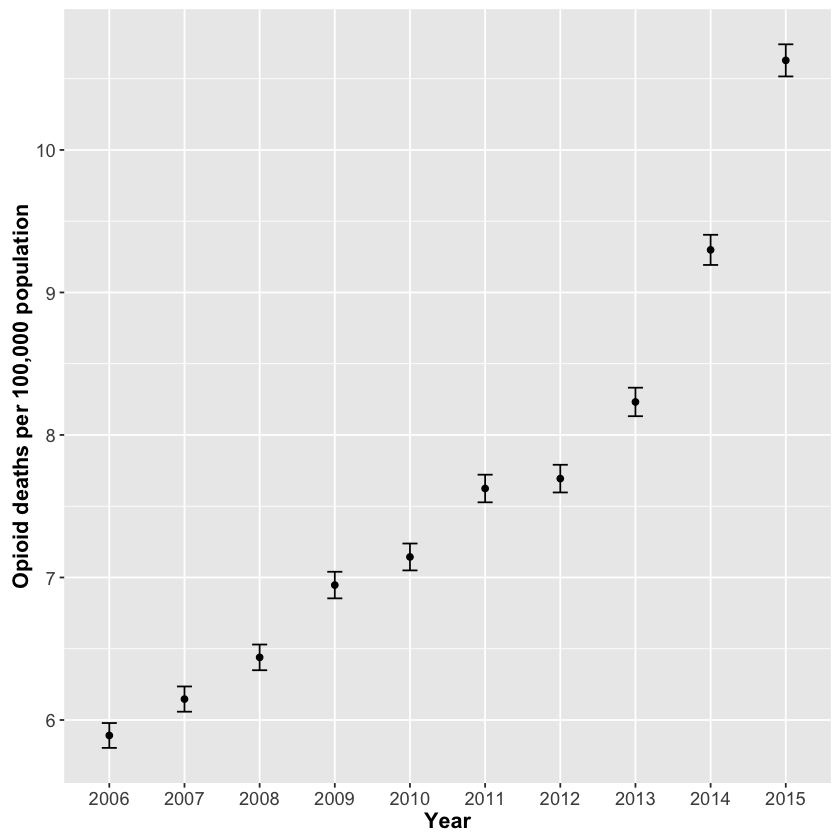

In [47]:
 ggplot(year_death2, aes(x=Year, y=death_rate)) + geom_point() + geom_errorbar(aes(ymin=lower_95ci, ymax=upper_95ci), width=0.2) +  ylab("Opioid deaths per 100,000 population") + theme(axis.text=element_text(size=11), axis.title=element_text(size=13, face="bold"))

With the 2015 death rate (10.63 per 100,000 population) nearly twice the 2006 death rate (5.89 per 100,000 population), the evidence suggests that there is a crisis.  

#### b) How strong is the relationship between opioid prescription rate and opioid overdose rate? 
To investigate this question, a scatterplot was created which mapped prescribing_rate (per 100 pop) to death_rate (per 100 pop) for each of the 51 states (inc. DC) during the period 2006 to 2015. 

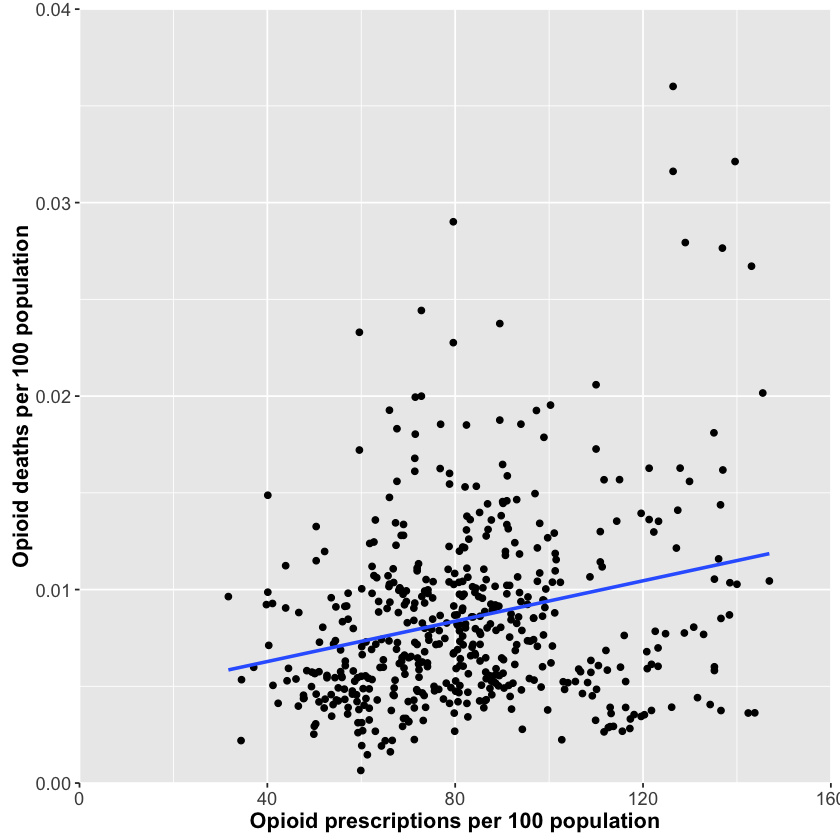

In [48]:
ggplot(presc_over_pov_all, aes(x=prescribing_rate, y=death_rate)) + geom_point() + geom_smooth(method="lm", se=FALSE) + scale_x_continuous(name="Opioid prescriptions per 100 population", expand=c(0,0), limits=c(0, 160)) + scale_y_continuous(name="Opioid deaths per 100 population", expand=c(0,0), limits=c(0, 0.04)) + theme(axis.text=element_text(size=11), axis.title=element_text(size=13, face="bold")) 


Correlation coefficients were calculated between: 
1. Death rate 
2. Prescribing rate 
3. Poverty rate 

In [50]:
  corr_var <- as.matrix(presc_over_pov_all[, .(death_rate, prescribing_rate, poverty_rate)])
  rcorr(corr_var, type="pearson")

                 death_rate prescribing_rate poverty_rate
death_rate             1.00             0.25         0.06
prescribing_rate       0.25             1.00         0.54
poverty_rate           0.06             0.54         1.00

n= 508 


P
                 death_rate prescribing_rate poverty_rate
death_rate                  0.0000           0.1948      
prescribing_rate 0.0000                      0.0000      
poverty_rate     0.1948     0.0000                       

There is evidence of a positive linear relationship between death rate and prescribing rate (r = 0.25, p < 0.01).  However, the variation in death rate accounted for by prescribing rate (R<sup>2</sup> = 0.0625) is only 6.25%, which suggests that there are other, unknown variables which may better explain death rates.  In short, the claim that higher prescription rates lead to higher opioid death rates is not strongly supported.  

#### 3. How does the relationship between opioid prescription rate and opioid overdose death rate change given knowledge of the poverty rate? 
Partial correlations allow us to understand the relationship between two variables, whilst controlling for a third.  In this example, we can see from the correlation matrix above that there is a significant linear relationship between: 
- death_rate and prescribing_rate (r = 0.25, p < 0.01) 
- prescribing_rate and poverty_rate (r = 0.54, p < 0.01) 

By calculating the partial correlation matrix of death_rate, prescribing_rate and poverty_rate, we can determine the relationship between death_rate and prescribing_rate, given the poverty_rate. 

In [51]:
  pcor(corr_var, method="pearson")


,death_rate,prescribing_rate,poverty_rate
death_rate,1.0000000,0.2589588,-0.0943259
prescribing_rate,0.2589588,1.0000000,0.5445141
poverty_rate,-0.0943259,0.5445141,1.0000000
,death_rate,prescribing_rate,poverty_rate
death_rate,0.000000e+00,3.264051e-09,3.372050e-02
prescribing_rate,3.264051e-09,0.000000e+00,1.765775e-40
poverty_rate,3.372050e-02,1.765775e-40,0.000000e+00
,death_rate,prescribing_rate,poverty_rate
death_rate,0.000000,6.024894,-2.129204
prescribing_rate,6.024894,0.000000,14.588861


The partial correlation between death rate and prescribing rate (r = 0.256, p < 0.01) is similar to the correlation between death rate and prescribing rate (r = 0.25) which suggests that poverty does not influence the relationship between the two.  In other words, prescribing rate and opioid overdose death rate co-vary in a similar way regardless of poverty rate. 

Furthermore, the partial relationship between death rate and poverty rate (r = -0.09, p < 0.05) suggests that, when controlling for prescribing rate (which positively correlates with death rate), there is actually a negative relationship. In other words, when stripping out the effect of prescribing on overdose deaths, increased poverty is very weakly associated with a reduced overdose death rate.  

### 5. Discussion and conclusion 
The results of this study concur with other research<sup>9</sup> which has highlighted the escalating nature of opioid related deaths in the US over the last 15 years.  However, contrary to some research<sup>10</sup>, this study did __not__ find that prescribing rates were strongly associated with opioid related death rates.  As such, initiatives and policies which seek to limit medical opioid prescribing may actually do more harm than good by depriving patients of necessary therapeutic pain relief.  In other words, this study does not support the policy, as has been adopted in some jurisdictions in the US, that reducing prescribing rates will reduce opioid death rates.  

There was no evidence that the relationship between opioid death rate and prescribing rate was influenced by poverty rate.  This is in contrast to existing research<sup>3, </sup><sup>10, </sup><sup>11</sup> which suggests that poverty is a leading determinant of opioid overdose.  One reason for this, which is a limitation of this research, is that these studies have used data at a county level which exhibit a much greater level of variation than the state level and are therefore more sensitive to identifying relationships that may be obscured at a more macro level.  Thus, further research could involve replicating the above analysis at a county level. 

In conclusion, this study further highlights the need to address the levels of opioid overdose death rates which currently show no signs of decreasing.  However, in doing so, policymakers should avoid knee-jerk reactions which seek to limit the availability of opioid medications to patients, as there is little evidence that this would do anything to solve the crisis. 


### 6.  References

<sup>1</sup>Rudd, R. A., Seth, P., David, F. & Scholl, L. (2016). “Increases in Drug and Opioid-Involved Overdose Deaths – United States, 2010-2015”, Morbidity and Mortality Weekly Report, December 20, pp 1445-1452. Centers for Disease Control and Prevention.

<sup>2</sup>Guy, G. P., Zhang, K., Bohm, M. K., Losby, J., Lewis, B., Young, R., Murphy, L. B. & Dowell, D. (2017). “Vital Signs: Changes in Opioid Prescribing in the United States: 2006-2015”, Morbidity and Mortality Weekly Report, July 7, pp 697-704.  Centers for Disease Control and Prevention.

<sup>3</sup>Cicero, T., Surratt, H., Inciardi, J. & Munoz, A. (2007). “Relationship between therapeutic use and abuse of opioid analgesics in rural, suburban and urban locations in the United States”, Pharmacoepidemiol Drug Safety, 16, pp 827-840.

<sup>4</sup>Guy et al (ibid). 

<sup>5</sup>Rudd et al (ibid). 

<sup>6</sup>Paulozzi, L. J., Mack, K. A. & Hockenberry, J. M. (2014). “Vital Signs: Variation Among States in Prescribing of Opioid Pain Relievers and Benzodiazepines – United States, 2012”, Morbidity and Mortality Weekly Report, pp 563-568.  Centers for Disease Control and Prevention.

<sup>7</sup>Guy et al (ibid). 

<sup>8</sup>Lewis, M. (ibid). "The truth about the US 'opioid crisis' – prescriptions aren't the problem”, The Guardian, 7 November.

<sup>9</sup>Rudd et al (ibid).  

<sup>10</sup>Blumenthal, D. & Seervai, S. (2017). "To Combat the Opioid Epidemic, We Must Be Honest About All Its Causes", Harvard Business Review, 26 October. 

<sup>11</sup>Kneebone, E. & Allard, S. W. (2017). "Report: A nation in overdose peril: Pinpointing the most impacted communities and the local gaps in care". Brookings Institute, September 25. 